# Homework 04

The goal for this homework will be to learn more about how you can use ```groupby``` and how merging can be used to improve your ability to generate hypotheses.

We will use the FluSurv Net dataset provided by the WHO. 
This dataset is linked on coursesite and called ```FluNetData[...]```. 

This dataset has recorded, for each country, the number of lab-confirmed cases of influenza from sentinal sites (Sent), non-sentinal sites (Non-Sent), and sites that have not yet been defined as Sent or Non-Sent.



In [67]:
import pandas as pd
d = pd.read_csv("FlunetData_Global_All Sites_for year-weeks 2013-01 to 2025-05.csv")

d["pct_positive"] = d["Influenza positive"] / d["Specimen tested"]


hem = pd.read_csv("country_hemisphere_classification (1).csv")

d = d.merge(hem, on = "Country area or territory")

yrs = [int(x.split("-")[0]) for x in d['Year-week (ISO 8601 calendar)']]
d["YR"] = yrs

d = d.loc[d.Hemisphere!="Both"]

print(d["Country area or territory"].unique())

aus = d.loc[ d["Country area or territory"] =="Australia",: ]
aus

us = d.loc[ d["Country area or territory"] =="United States of America",: ]
us

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Bermuda' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'British Virgin Islands' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'China, Hong Kong SAR'
 'Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Côte d’Ivoire'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Dominica'
 'Dominican Republic' 'Egypt' 'El Salvador' 'Estonia' 'Ethiopia' 'Fiji'
 'Finland' 'France' 'French Guiana' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Grenada' 'Guadeloupe' 'Guatemala' 'Guinea' 'Guyana' 'Haiti' 'Honduras'
 'Hungary' 'Iceland' 'India' 'Iran (Islamic Republic of)' 'Iraq' 'Ireland'
 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan

,Unnamed: 0,Country area or territory,Surveillance site type,Year-week (ISO 8601 calendar),Week start date (ISO 8601 calendar),Specimen tested,Influenza positive,Influenza negative,A (H1),A (H1N1)pdm09,A (H3),A (H5),A not subtyped,B (Victoria),B (Yamagata),B (lineage not determined),pct_positive,Hemisphere,YR
103050,103051,United States of America,Non-sentinel,2015-41,2015-10-05,12029,127,11902,NaN,NaN,NaN,NaN,84.0,NaN,NaN,43.0,0.010558,NaN,2015
103051,103052,United States of America,Non-sentinel,2015-42,2015-10-12,13111,170,12941,NaN,NaN,NaN,NaN,116.0,NaN,NaN,54.0,0.012966,NaN,2015
103052,103053,United States of America,Non-sentinel,2015-43,2015-10-19,13441,149,13292,NaN,NaN,NaN,NaN,97.0,NaN,NaN,52.0,0.011085,NaN,2015
103053,103054,United States of America,Non-sentinel,2015-44,2015-10-26,13537,150,13387,NaN,NaN,NaN,NaN,98.0,NaN,NaN,52.0,0.011081,NaN,2015
103054,103055,United States of America,Non-sentinel,2015-45,2015-11-02,14687,165,14522,NaN,NaN,NaN,NaN,97.0,NaN,NaN,68.0,0.011234,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104155,104156,United States of America,Sentinel,2024-49,2024-12-02,2626,1469,1157,NaN,558.0,726.0,3.0,121.0,33.0,0.0,28.0,0.559406,NaN,2024
104156,104157,United States of America,Sentinel,2024-50,2024-12-09,3267,2113,1154,NaN,829.0,983.0,5.0,219.0,40.0,0.0,37.0,0.646771,NaN,2024
104157,104158,United States of America,Sentinel,2024-51,2024-12-16,3975,2902,1073,NaN,1120.0,1433.0,1.0,300.0,20.0,0.0,28.0,0.730063,NaN,2024
104158,104159,United States of America,Sentinel,2024-52,2024-12-23,3261,2467,794,NaN,927.0,1079.0,0.0,417.0,10.0,0.0,34.0,0.756516,NaN,2024


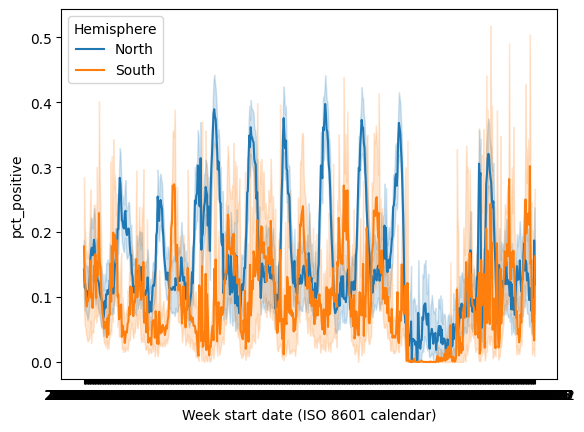

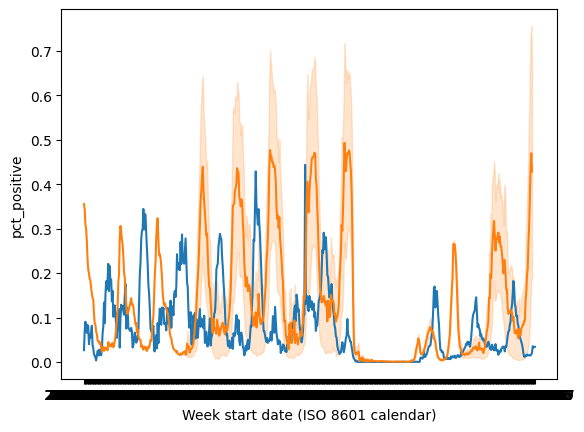

/var/folders/gz/t2mqv3h97_bcfv3l8vcgf5rc0000gp/T/ipykernel_74752/2634257451.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  d_total = d.groupby(["Country area or territory"]).apply(total).reset_index()


ValueError: cannot insert Country area or territory, already exists

In [72]:
dsent = d.loc[d["Surveillance site type"]=="Sentinel",:]


sns.lineplot(x = "Week start date (ISO 8601 calendar)", hue="Hemisphere", y="pct_positive"
             ,data=d )
plt.show()

sns.lineplot(x = "Week start date (ISO 8601 calendar)", y="pct_positive"
             ,data=aus )

sns.lineplot(x = "Week start date (ISO 8601 calendar)", y="pct_positive"
             ,data=us )
plt.show()

In [111]:
def total(x):
    ttl_pos      = np.sum( x["Influenza positive"])
    ttl_tested   = np.sum( x["Specimen tested"])
    
    return pd.Series({"pos":ttl_pos, "tests":ttl_tested})
    
    
d_total = d.groupby(["Country area or territory"
                     ,"Week start date (ISO 8601 calendar)"]).apply(total).reset_index()

/var/folders/gz/t2mqv3h97_bcfv3l8vcgf5rc0000gp/T/ipykernel_74752/2566629469.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ,"Week start date (ISO 8601 calendar)"]).apply(total).reset_index()


In [112]:
d_total = d_total.loc[d_total.tests!=0]
d_total["p"] = d_total.pos/d_total.tests

In [113]:

aus = d_total.loc[ d_total["Country area or territory"] =="Australia",: ]
aus

us = d_total.loc[ d_total["Country area or territory"] =="United States of America",: ]
us

# sns.lineplot(x = "Week start date (ISO 8601 calendar)", hue="Hemisphere", y="p"
#              ,data=d_total )
# plt.show()

# sns.lineplot(x = "Week start date (ISO 8601 calendar)", y="p"
#              ,data=aus )

# sns.lineplot(x = "Week start date (ISO 8601 calendar)", y="p"
#              ,data=us )
# plt.show()

us

,Country area or territory,Week start date (ISO 8601 calendar),pos,tests,p
72053,United States of America,2012-12-31,6474,18219,0.355343
72054,United States of America,2013-01-07,6897,20013,0.344626
72055,United States of America,2013-01-14,5936,19228,0.308716
72056,United States of America,2013-01-21,5130,17139,0.299317
72057,United States of America,2013-01-28,4039,14795,0.272998
...,...,...,...,...,...
72675,United States of America,2024-12-02,6509,99037,0.065723
72676,United States of America,2024-12-09,10947,106127,0.103150
72677,United States of America,2024-12-16,19503,122040,0.159808
72678,United States of America,2024-12-23,23884,120130,0.198818


/var/folders/gz/t2mqv3h97_bcfv3l8vcgf5rc0000gp/T/ipykernel_74752/3031661708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aus['Smoothed_Mean'] = aus['p'].rolling(window=10).mean()
/var/folders/gz/t2mqv3h97_bcfv3l8vcgf5rc0000gp/T/ipykernel_74752/3031661708.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us['Smoothed_Mean'] = us['p'].rolling(window=10).mean()


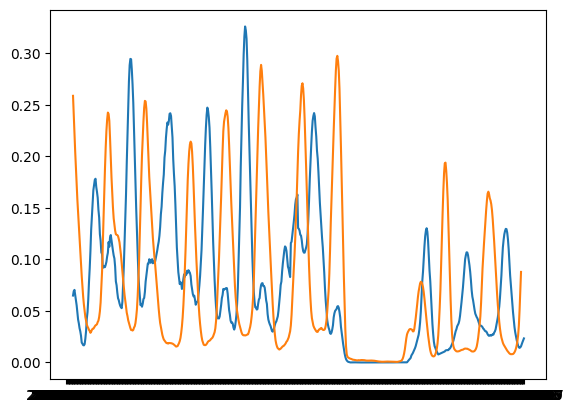

In [114]:
aus['Smoothed_Mean'] = aus['p'].rolling(window=10).mean()
plt.plot(aus["Week start date (ISO 8601 calendar)"], aus["Smoothed_Mean"])

us['Smoothed_Mean'] = us['p'].rolling(window=10).mean()
plt.plot(us["Week start date (ISO 8601 calendar)"], us["Smoothed_Mean"])

